# Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [3]:
df=pd.read_csv("Attrition data.csv")

In [4]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


# Data Cleaning and Preparation

In [7]:
# Display basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Handle missing values if necessary
# For simplicity, assuming no missing values in the provided data

# Convert categorical variables to numerical values
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], drop_first=True)

# Display first few rows to check conversion
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

 # Descriptive Statistics

In [8]:
# Basic statistics for numerical features
print(df.describe())

# Frequency distribution for categorical features
print(df['Attrition'].value_counts())


        EmployeeID          Age  DistanceFromHome    Education  EmployeeCount  \
count  4410.000000  4410.000000       4410.000000  4410.000000         4410.0   
mean   2205.500000    36.923810          9.192517     2.912925            1.0   
std    1273.201673     9.133301          8.105026     1.023933            0.0   
min       1.000000    18.000000          1.000000     1.000000            1.0   
25%    1103.250000    30.000000          2.000000     2.000000            1.0   
50%    2205.500000    36.000000          7.000000     3.000000            1.0   
75%    3307.750000    43.000000         14.000000     4.000000            1.0   
max    4410.000000    60.000000         29.000000     5.000000            1.0   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4391.000000        4410.000000   
mean      2.063946   65029.312925            2.694830          15.209524   
std       1.106689   47068.888559         

# Attrition Analysis

Attrition
No     3699
Yes     711
Name: count, dtype: int64
Overall Attrition Rate: 16.12%
Department_Research & Development
False    16.895874
True     15.712799
Name: Attrition_Yes, dtype: float64
JobRole_Research Scientist
False    15.619694
True     18.150685
Name: Attrition_Yes, dtype: float64


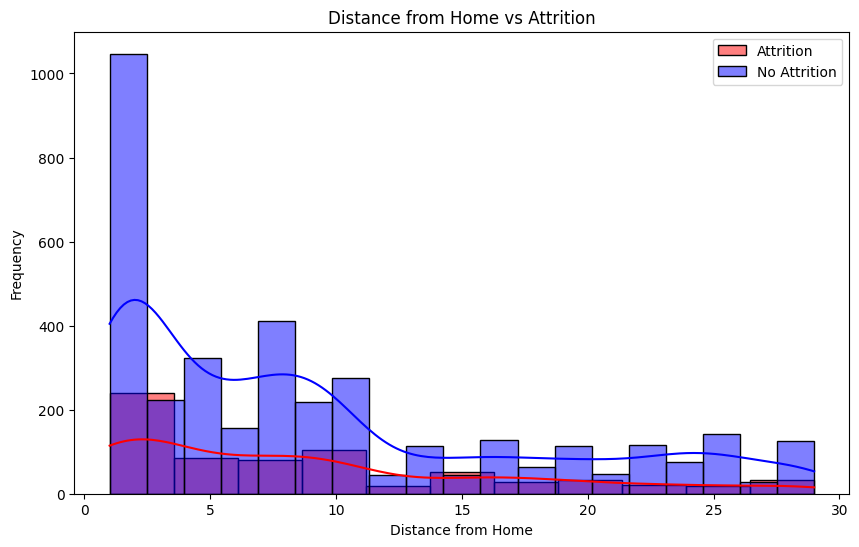

In [12]:
# Check if the 'Attrition' column has the correct values and update if necessary
print(df['Attrition'].value_counts())

# Convert 'Attrition' to a binary format if it is not already
df['Attrition_Yes'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Attrition rate
attrition_rate = df['Attrition_Yes'].mean() * 100
print(f'Overall Attrition Rate: {attrition_rate:.2f}%')

# Attrition by Department
# Make sure to replace 'Department_Research & Development' with the correct column name
attrition_by_department = df.groupby('Department_Research & Development')['Attrition_Yes'].mean() * 100
print(attrition_by_department)

# Attrition by Job Role
# Make sure to replace 'JobRole_Research Scientist' with the correct column name
attrition_by_job_role = df.groupby('JobRole_Research Scientist')['Attrition_Yes'].mean() * 100
print(attrition_by_job_role)

# Attrition by Distance from Home
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Attrition_Yes'] == 1]['DistanceFromHome'], kde=True, color='red', label='Attrition')
sns.histplot(df[df['Attrition_Yes'] == 0]['DistanceFromHome'], kde=True, color='blue', label='No Attrition')
plt.legend()
plt.title('Distance from Home vs Attrition')
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.show()


# Verify Column Names

In [17]:
# Print the column names of the DataFrame
print(df.columns)


Index(['EmployeeID', 'Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_

# Factors Influencing Attrition


C:\Users\91850\AppData\Local\Temp\ipykernel_40124\191099910.py:42: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Non-numeric columns remaining: Index(['Attrition', 'Over18'], dtype='object')
Attrition_Yes                        1.000000
MaritalStatus_Single                 0.175419
BusinessTravel_Travel_Frequently     0.115143
JobRole_Research Director            0.049760
NumCompaniesWorked                   0.042345
PercentSalaryHike                    0.032533
JobRole_Research Scientist           0.027460
PerformanceRating                    0.023403
Gender_Male                          0.018125
EducationField_Life Sciences         0.012394
JobRole_Sales Executive              0.010869
JobRole_Laboratory Technician        0.001179
EducationField_Medical               0.000764
EducationField_Marketing            -0.003780
EmployeeID                          -0.004729
StockOptionLevel                    -0.006839
DistanceFromHome                    -0.009730
JobLevel                            -0.010290
JobRole_Sales Representative        -0.011073
JobRole_Human Resources             -0.013857
Ed

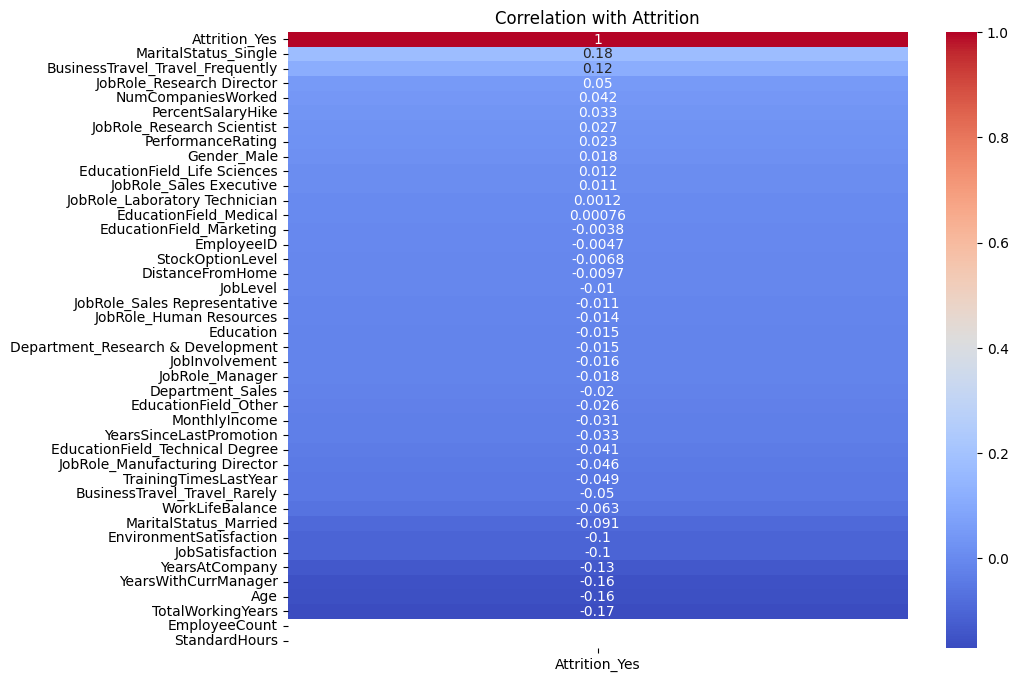

In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_columns = [
    'BusinessTravel_Travel_Frequently', 
    'BusinessTravel_Travel_Rarely', 
    'Department_Research & Development', 
    'Department_Sales', 
    'EducationField_Life Sciences', 
    'EducationField_Marketing', 
    'EducationField_Medical', 
    'EducationField_Other', 
    'EducationField_Technical Degree', 
    'Gender_Male', 
    'JobRole_Human Resources', 
    'JobRole_Laboratory Technician', 
    'JobRole_Manager', 
    'JobRole_Manufacturing Director', 
    'JobRole_Research Director', 
    'JobRole_Research Scientist', 
    'JobRole_Sales Executive', 
    'JobRole_Sales Representative', 
    'MaritalStatus_Married', 
    'MaritalStatus_Single'
]

# Convert categorical columns to numeric using label encoding
for column in categorical_columns:
    if column in df.columns:
        df[column] = le.fit_transform(df[column])
    else:
        print(f'Column {column} not found in DataFrame.')

# Convert 'Attrition_Yes' column to numeric if it's not already
if 'Attrition_Yes' in df.columns and df['Attrition_Yes'].dtype == 'object':
    df['Attrition_Yes'] = le.fit_transform(df['Attrition_Yes'])

# Convert any remaining non-numeric columns to numeric
df = df.apply(pd.to_numeric, errors='ignore')

# Check for remaining non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns remaining:", non_numeric_columns)

# Drop non-numeric columns if any are left
df = df.drop(columns=non_numeric_columns, errors='ignore')

# Calculate correlations
correlations = df.corr()
print(correlations['Attrition_Yes'].sort_values(ascending=False))

# Visualize correlations with Attrition
plt.figure(figsize=(10, 8))
sns.heatmap(correlations[['Attrition_Yes']].sort_values(by='Attrition_Yes', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Attrition')
plt.show()


# Calculating the Chi-Square test

In [21]:
from scipy.stats import chi2_contingency

# Create contingency table for Job Role and Attrition
job_role_attrition = pd.crosstab(df['JobRole_Research Scientist'], df['Attrition_Yes'])

# Perform Chi-square test
chi2, p, _, _ = chi2_contingency(job_role_attrition)

# Print p-value
print(f'Chi-square test for Job Role and Attrition: p-value = {p:.4f}')


Chi-square test for Job Role and Attrition: p-value = 0.0764


# Visualization for Dashboard

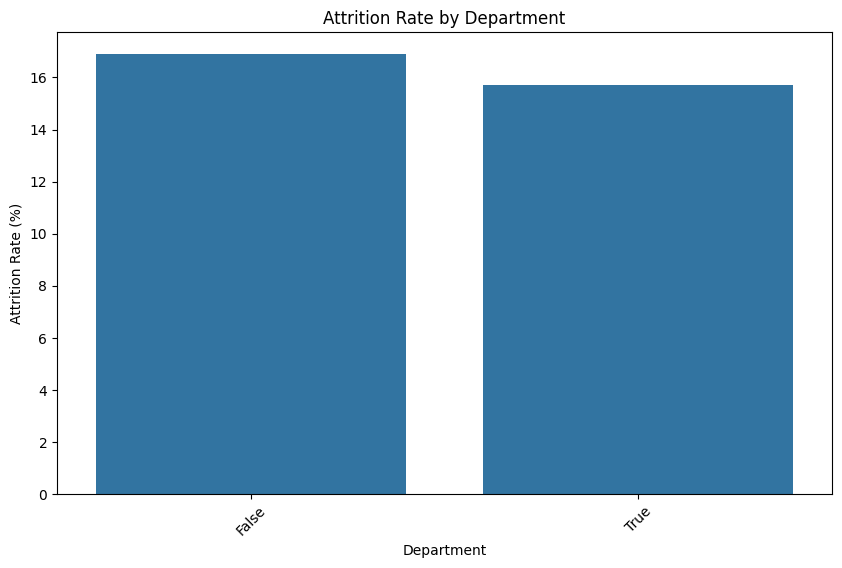

In [23]:
# Attrition by Department
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_by_department.index, y=attrition_by_department.values)
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()


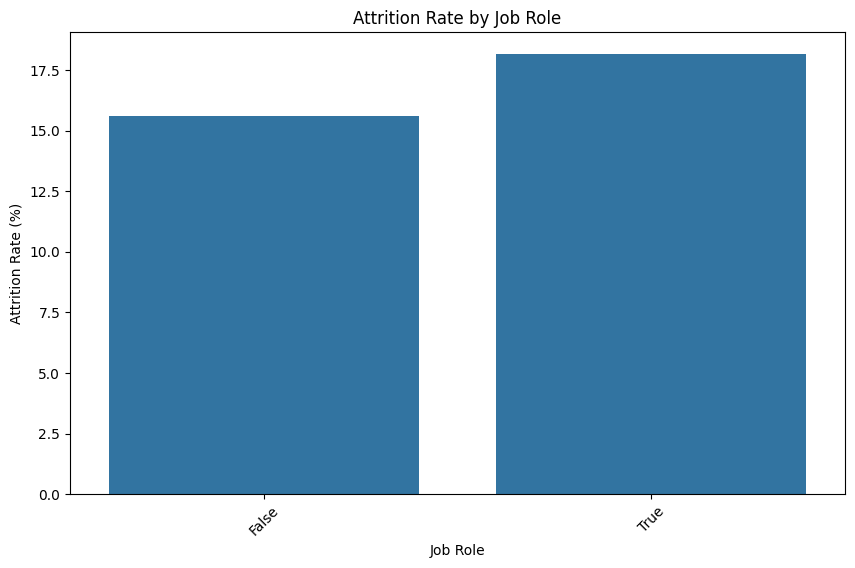

In [24]:
# Attrition by Job Role
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_by_job_role.index, y=attrition_by_job_role.values)
plt.title('Attrition Rate by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()


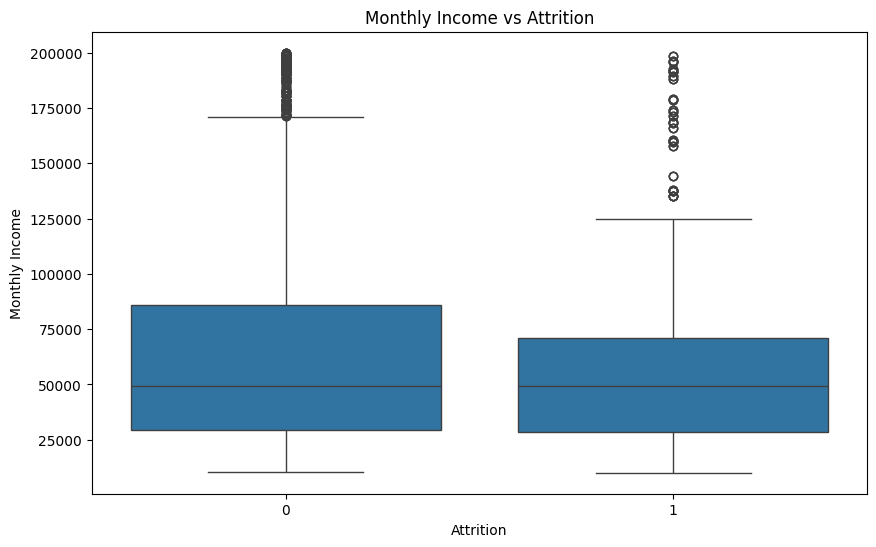

In [27]:


# Income vs Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Yes', y='MonthlyIncome', data=df)  # Use df instead of data
plt.title('Monthly Income vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()
